In [1]:
import sys

sys.path.append('../')
from auton_survival import datasets
outcomes, features = datasets.load_support()

In [2]:
import numpy as np
horizons = [0.25, 0.5, 0.75]
times = np.quantile(outcomes.time[outcomes.event==1], horizons).tolist()

In [4]:
from auton_survival.phenotyping import IntersectionalPhenotyper

In [5]:
phenotypes = IntersectionalPhenotyper(cat_vars=['race'], num_vars=['age']).fit_phenotype(features)

/Users/chiragn/Research/auton-survival/examples/../auton_survival/phenotyping.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[num_var][features[num_var]>=var_max] = var_max
/Users/chiragn/Research/auton-survival/examples/../auton_survival/phenotyping.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[num_var][features[num_var]<=var_min] = var_min


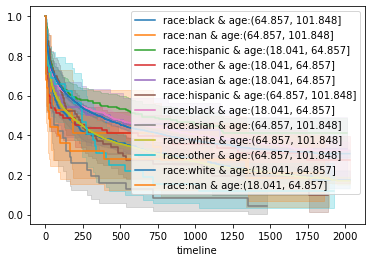

In [6]:
from auton_survival import reporting

reporting.plot_kaplanmeier(outcomes, phenotypes)

In [7]:
from auton_survival.preprocessing import Preprocessor

cat_feats = ['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca']
num_feats = ['age', 'num.co', 'meanbp', 'wblc', 'hrt', 'resp', 
	     'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 
             'glucose', 'bun', 'urine', 'adlp', 'adls']

features_processed = Preprocessor().fit_transform(features, cat_feats=cat_feats, num_feats=num_feats)

In [15]:
from auton_survival.phenotyping import ClusteringPhenotyper

phenotypes = ClusteringPhenotyper(n_clusters=3, dim_red_method='pca', n_components=8).fit_phenotype(features_processed)

reporting.plot_kaplanmeier(outcomes, phenotypes.argmax(axis=1))

Fitting the following Dimensionality Reduction Model:
 PCA(n_components=8)
Fitting the following Clustering Model:
 KMeans(n_clusters=3)
